In [32]:
import pandas as pd

dataset=pd.read_csv("books.csv", error_bad_lines=False)

dataset.head()

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [33]:
type(dataset)
cols=[1,2,3,5,6,7,8,9]
dataset=dataset[dataset.columns[cols]]
dataset.head()

,title,authors,average_rating,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,9780439785969,eng,652,1944099,26249
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,9780439358071,eng,870,1996446,27613
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,9780439554930,eng,320,5629932,70390
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,9780439554893,eng,352,6267,272
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,9780439655484,eng,435,2149872,33964


In [34]:
dataset[ dataset['average_rating'] != 0 ].mean()

average_rating        3.940389e+00
isbn13                9.763973e+12
# num_pages           3.427563e+02
ratings_count         1.780955e+04
text_reviews_count    5.349583e+02
dtype: float64

In [35]:
sum(dataset['average_rating']==0)

34

In [36]:
mean_ar = dataset['average_rating'].mean(skipna=True)
dataset['average_rating']=dataset['average_rating'].replace(0,mean_ar)

In [37]:
sum(dataset['# num_pages']==0)


85

In [38]:
mean_np = dataset['# num_pages'].mean(skipna=True)
dataset['# num_pages']=dataset['# num_pages'].replace(0,mean_np)

In [39]:
sum(dataset['ratings_count']==0)

114

In [40]:
mean_rc = dataset['ratings_count'].mean(skipna=True)
dataset['ratings_count']=dataset['ratings_count'].replace(0,mean_rc)

In [41]:
sum(dataset['text_reviews_count']==0)

909

In [42]:
mean_tr = dataset['text_reviews_count'].mean(skipna=True)
dataset['text_reviews_count']=dataset['text_reviews_count'].replace(0,mean_tr)

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 8 columns):
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
isbn13                13714 non-null int64
language_code         13714 non-null object
# num_pages           13714 non-null float64
ratings_count         13714 non-null float64
text_reviews_count    13714 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 857.2+ KB


In [44]:
dataset.describe()

,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.000000,1.371400e+04,13714.000000,1.371400e+04,13714.000000
mean,3.940365,9.764017e+12,344.524955,1.791308e+04,569.002669
std,0.299477,3.987679e+11,251.198909,1.129455e+05,2525.024246
min,1.000000,8.987060e+09,1.000000,1.000000e+00,1.000000
25%,3.770000,9.780345e+12,199.000000,8.900000e+01,12.000000
50%,3.960000,9.780613e+12,304.000000,6.715000e+02,63.000000
75%,4.130000,9.780940e+12,421.000000,5.061750e+03,387.000000
max,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


In [45]:
from scipy import stats

stats.gmean(dataset['# num_pages'])


267.7787897584006

In [46]:
stats.hmean(dataset['# num_pages'])

116.76459621130095

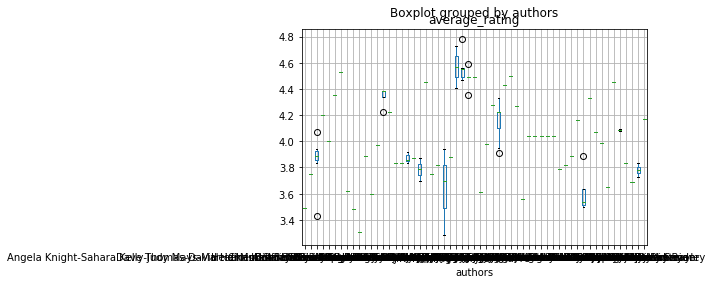

In [47]:
import matplotlib.pyplot as plt
df=dataset.head(100)
df.boxplot(column="average_rating", by="authors")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FE3BE1D30>]],
      dtype=object)

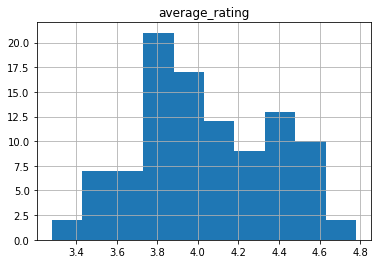

In [48]:
df.hist(column="average_rating")

In [49]:
freq = {} 
#df['average_rating']=df['average_rating'].astype('float64')
for item in df['average_rating']: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1

In [50]:
key=[x for x in freq.keys()]
key

[4.56,
 4.49,
 4.47,
 4.41,
 4.55,
 4.78,
 3.69,
 4.73,
 4.38,
 4.22,
 4.2,
 3.43,
 3.88,
 4.07,
 3.9,
 3.83,
 3.87,
 3.92,
 3.94,
 4.59,
 4.35,
 4.53,
 4.5,
 3.61,
 3.89,
 3.7,
 3.97,
 4.33,
 3.48,
 3.75,
 3.6,
 4.17,
 3.56,
 3.99,
 4.16,
 4.43,
 3.95,
 4.15,
 4.24,
 3.91,
 3.73,
 4.45,
 3.98,
 3.28,
 3.82,
 4.0,
 3.85,
 4.28,
 3.31,
 3.79,
 3.49,
 3.5,
 3.62,
 3.52,
 4.27,
 3.55,
 4.09,
 4.08,
 3.65,
 4.04]

In [51]:
value=[freq[x] for x in freq.keys()]
value

[1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 5,
 1,
 1,
 2,
 2,
 2,
 8,
 4,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 3,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5]

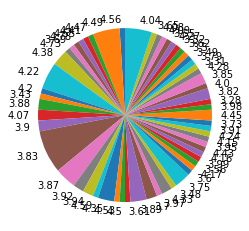

In [52]:
plt.pie(value,labels=key,startangle=90)
plt.show()

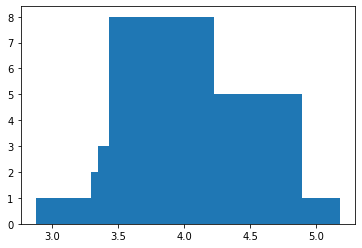

In [53]:
plt.bar(key,value)
plt.show()

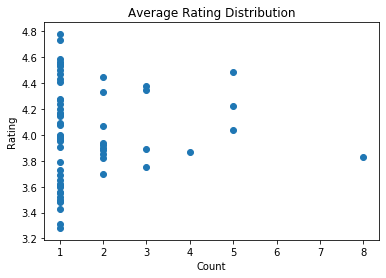

In [55]:
plt.scatter(value, key)
plt.title('Average Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
freq = {} 
#df['average_rating']=df['average_rating'].astype('float64')
for item in df['average_rating']: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1plt.show()

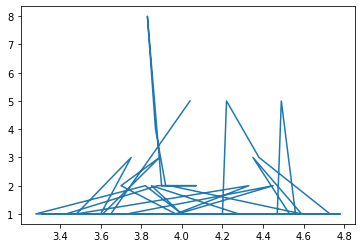

In [87]:
plt.plot(df['average_rating'].unique().tolist(),value)